In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [23]:
AV1_ALL = True
csv_path = ""

# CSVファイルのパス
if AV1_ALL:
    csv_path = "../output/all_data_evaluation_metrics_pd_2025_0804_v1.0.csv"
else:
    csv_path = "../output/evaluation_metrics_pd_2025_0804_v1.0.csv"

# DataFrameに読み込む
df = pd.read_csv(csv_path)

# 確認
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39472 entries, 0 to 39471
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sample_ID   39472 non-null  int64  
 1   minADE_k    39472 non-null  float64
 2   minFDE_k    39472 non-null  float64
 3   MR_k        39472 non-null  float64
 4   b-minFDE_k  39472 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.5 MB


# 1️⃣ 各指標の分布（ヒストグラム + KDE）
- 各指標がどの範囲に集中しているかを把握
- 外れ値や閾値候補を視覚的に確認

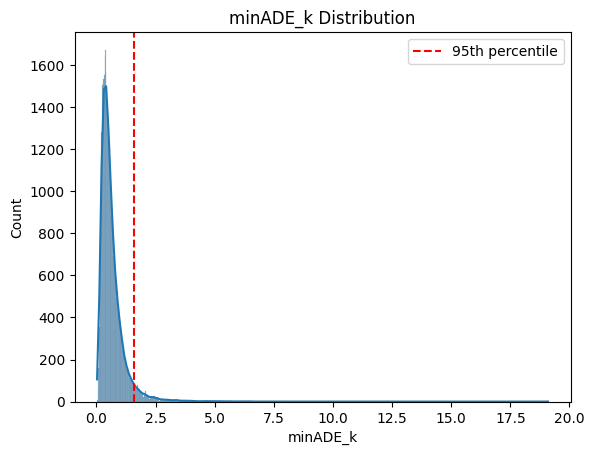

minADE_k の95パーセンタイル: 1.57442


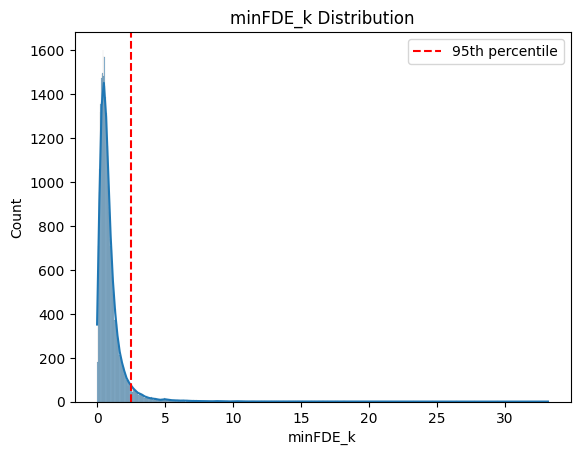

minFDE_k の95パーセンタイル: 2.52708


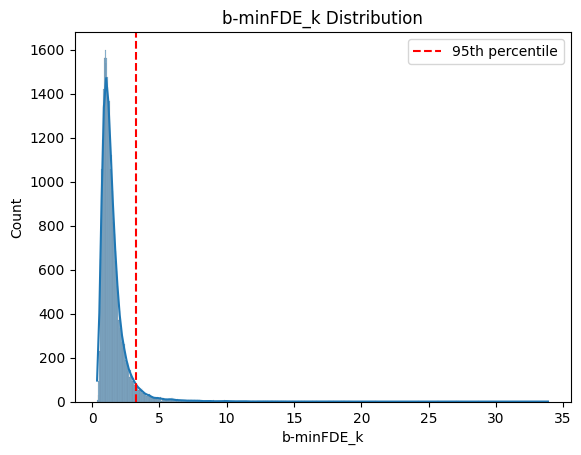

b-minFDE_k の95パーセンタイル: 3.25164


In [16]:
metrics = ['minADE_k', 'minFDE_k', 'b-minFDE_k']
for metric in metrics:
    sns.histplot(df[metric], kde=True)
    plt.axvline(df[metric].quantile(0.95), color='red', linestyle='--', label='95th percentile')
    plt.title(f'{metric} Distribution')
    plt.legend()
    plt.show()
    value_95 = df[metric].quantile(0.95)
    print(f"{metric} の95パーセンタイル: {value_95:.5f}")

In [24]:
metrics = ['minADE_k', 'minFDE_k', 'b-minFDE_k']

# 95% と 5% タイルの閾値を計算
quantiles_95 = {m: df[m].quantile(0.95) for m in metrics}
quantiles_05 = {m: df[m].quantile(0.05) for m in metrics}

# すべてのメトリクスで 95% タイル超え
mask_high = (df[metrics[0]] > quantiles_95[metrics[0]]) & \
            (df[metrics[1]] > quantiles_95[metrics[1]]) & \
            (df[metrics[2]] > quantiles_95[metrics[2]])

# すべてのメトリクスで 5% タイル以下
mask_low = (df[metrics[0]] < quantiles_05[metrics[0]]) & \
           (df[metrics[1]] < quantiles_05[metrics[1]]) & \
           (df[metrics[2]] < quantiles_05[metrics[2]])

# 該当する sample_ID を取得
high_samples = df.loc[mask_high, "sample_ID"].tolist()
low_samples = df.loc[mask_low, "sample_ID"].tolist()

print("95%タイルを超えるサンプル数:", len(high_samples))
print("sample_IDs:", high_samples)

print("5%タイル未満のサンプル数:", len(low_samples))
print("sample_IDs:", low_samples)


95%タイルを超えるサンプル数: 1107
sample_IDs: [10025, 10035, 10082, 10138, 10174, 10180, 10226, 10279, 103, 10315, 10411, 10440, 1048, 10587, 1059, 1061, 10653, 10657, 10662, 10663, 10678, 10685, 10732, 10748, 10780, 10802, 10866, 10966, 10984, 10998, 11013, 11027, 11033, 1111, 1112, 11134, 11150, 11169, 1123, 11255, 11297, 11316, 11385, 11390, 11450, 11496, 1150, 11532, 11544, 11566, 11579, 11592, 11596, 11617, 11648, 1175, 11750, 11792, 11824, 11871, 11883, 11964, 11987, 12049, 12061, 12064, 12120, 12143, 12169, 1218, 12180, 1221, 12270, 1230, 12323, 12337, 12361, 1239, 12405, 12407, 12433, 12435, 125, 12501, 12509, 12538, 12566, 12601, 12610, 12633, 12638, 12645, 1268, 12701, 12782, 12815, 12874, 12894, 12898, 12906, 12955, 1297, 12999, 13020, 13171, 13174, 13193, 1321, 13226, 13325, 13345, 13442, 13448, 13546, 13587, 1368, 13692, 13711, 13736, 13743, 13756, 13764, 13765, 13839, 13873, 13921, 13938, 1395, 13950, 14011, 14013, 14071, 14088, 14108, 14171, 1419, 14377, 14387, 14476, 14516, 14520, 

In [25]:
# 抽出
high_samples_df = df.loc[mask_high, ["sample_ID"] + metrics]
low_samples_df = df.loc[mask_low, ["sample_ID"] + metrics]

# CSVに書き出し
high_samples_df.to_csv("../output/high_samples_above_95th.csv", index=False)
low_samples_df.to_csv("../output/low_samples_below_5th.csv", index=False)

print("95%タイル超えサンプルを ../output/high_samples_above_95th.csv に保存しました")
print("5%タイル未満サンプルを ../output/low_samples_below_5th.csv に保存しました")

95%タイル超えサンプルを ../output/high_samples_above_95th.csv に保存しました
5%タイル未満サンプルを ../output/low_samples_below_5th.csv に保存しました


# 2️⃣ minFDEの累積分布（CDF）
- MRの定義（2m以上）を反映しやすい
- 全サンプル中、2m以上の割合を可視化
- MR_k と minFDE_k の関係を確認

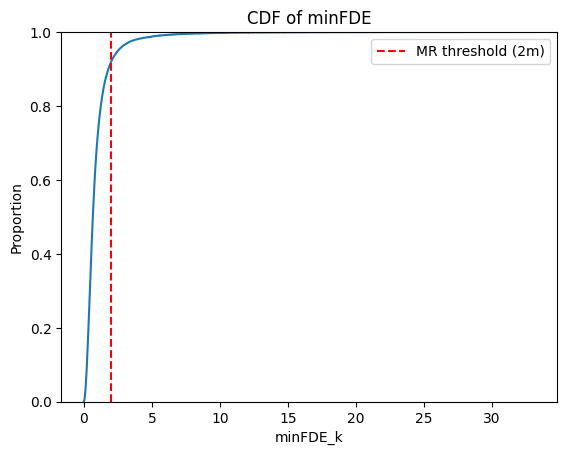

In [17]:
sns.ecdfplot(df['minFDE_k'])
plt.axvline(2.0, color='red', linestyle='--', label='MR threshold (2m)')
plt.title('CDF of minFDE')
plt.legend()
plt.show()

In [18]:
threshold = 2.0

# minFDE_k の 2m 以下の割合を計算
cdf_value = (df['minFDE_k'] <= threshold).mean()

print(f"minFDE_k = 2.0m の累積確率 (縦軸の交差点): {cdf_value:.4f}")

minFDE_k = 2.0m の累積確率 (縦軸の交差点): 0.9188


In [19]:
thresholds = [1.0, 2.0, 3.0]
cdf_values = {t: (df['minFDE_k'] <= t).mean() for t in thresholds}

print(cdf_values)

{1.0: 0.7112636805837049, 2.0: 0.9187525334414268, 3.0: 0.9654438589379813}


# 3️⃣ 指標間の関係（散布図 / ペアプロット）
- minADE, minFDE, b-minFDE の相関関係を可視化
- 例えば minFDE が悪いシナリオは b-minFDE も大きいか確認

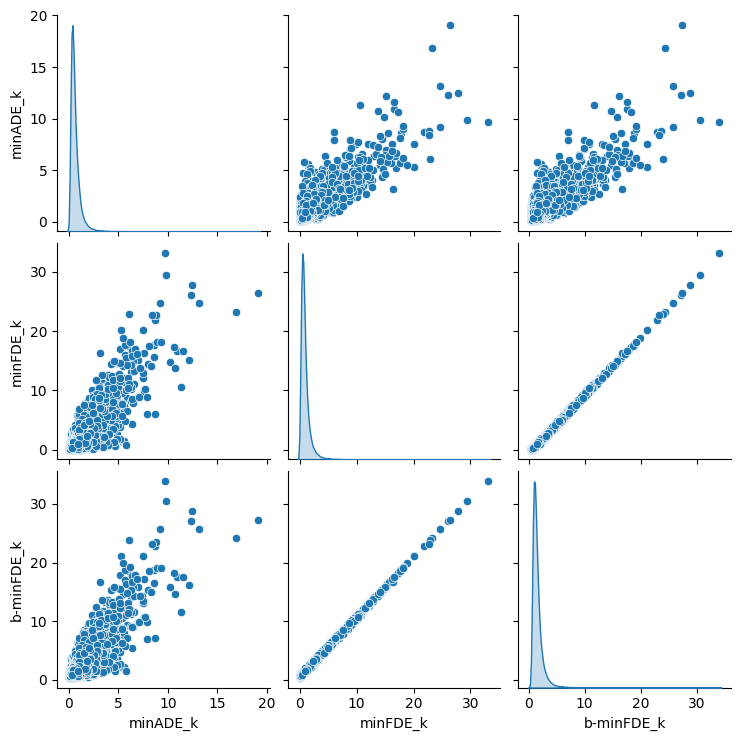

In [20]:
sns.pairplot(df[['minADE_k', 'minFDE_k', 'b-minFDE_k']], diag_kind='kde')
plt.show()

# 4️⃣ 良い/悪いシナリオのラベル分け
- 仮の閾値（例：minFDE > 2.0m or b-minFDE > 2.0）で良/悪を色分け
- 可視的にクラスタが分かれるか確認

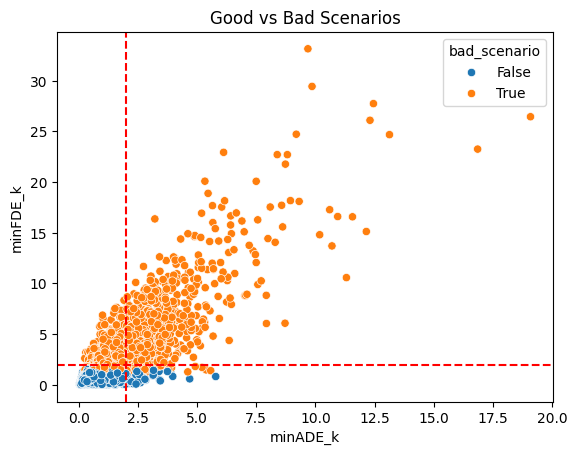

In [21]:
df['bad_scenario'] = (df['minFDE_k'] > 2.0) | (df['b-minFDE_k'] > 2.0)
sns.scatterplot(data=df, x='minADE_k', y='minFDE_k', hue='bad_scenario')
plt.axvline(2.0, color='red', linestyle='--')
plt.axhline(2.0, color='red', linestyle='--')
plt.title('Good vs Bad Scenarios')
plt.show()


# 5️⃣ MRの全体割合とシーン別ヒートマップ
- MR_k を全体の miss 率としてバー表示
- sample_ID を横軸にして MR のヒートマップ化で、missが発生しやすいサンプルを可視化

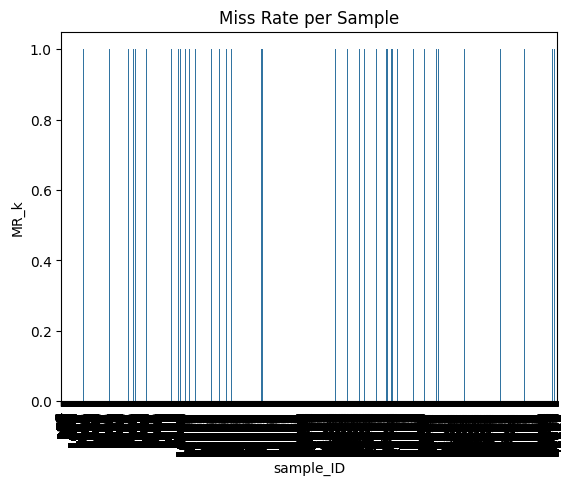

In [22]:
sns.barplot(x='sample_ID', y='MR_k', data=df)
plt.xticks(rotation=90)
plt.title('Miss Rate per Sample')
plt.show()


# ✅ 期待できる効果
1. ヒストグラム：指標の典型値と外れ値を把握 → 上位5%を悪いシナリオに設定

2. CDF：2m閾値の合理性を確認

3. 散布図：複数指標で悪いシナリオが集まる領域を発見

4. 良/悪色分け：識別器のラベル候補を視覚的に把握